In [1]:
import os
import pickle
import re
import xml.etree.ElementTree as ET
from collections import defaultdict

import ktrain
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ermal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ermal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
def to_string_utf8(document):
    return document.decode('utf-8')

def get_doc_data(filepath):
    tree = ET.parse(filepath)
    document = ET.tostring(tree.getroot(), encoding='utf-8', method='text')
    document = to_string_utf8(document)
    document = re.sub('[ \t\n]+', ' ', document)
    return document

def clean(text):
    lemmatizer = WordNetLemmatizer()
    stopwordList = set(stopwords.words("english"))
    words = text.lower().split(" ")
    cleaned_text = ""
    for word in words:
        if word in stopwordList:
            continue
        cleaned_text += lemmatizer.lemmatize(word) + " "

    return cleaned_text

In [4]:
path = "C:/Users/admin/Documents/Projects/accademic/python/bigdata_and_ai/ai/eur-lex-integration/output/oj"

In [5]:
documents = []
for doc in os.listdir(path):
    if doc.endswith(".xml"):
        # if doc.startswith("reg_" + year) and doc.endswith(".xml"):
        try:
            documents.append([doc, clean(get_doc_data(os.path.join(path, doc)))])
        except:
            pass

documents = np.array(documents)

In [6]:
"Building Model with Total documents:", len(documents)

('Building Model with Total documents:', 1331)

In [7]:
%%time
model = ktrain.text.get_topic_model(documents[:, 1], n_topics=None, n_features=10000)
model.build(documents[:, 1], threshold=0.1)

n_topics automatically set to 25
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
done.
Wall time: 1min 25s


In [15]:
topics = model.get_topics()
print("Total topics: ", len(topics))

Total topics:  25


In [8]:
"All Topics (topicId | nrOfDocumentsTalkingAboutThisTopic | distributionOfWordsForTheTopic):"
model.print_topics(show_counts=True)

topic:1 | count:319 | fishing agency management board paragraph joint vessel activity national including
topic:4 | count:230 | food mrls substance product maximum residue efsa existing risk safety
topic:17 | count:94 | financial programme support fund action objective cap development including payment
topic:19 | count:91 | entity person body legal natural listed economic cfsp good data
topic:14 | count:73 | product animal control point paragraph competent act health plant medicinal
topic:0 | count:70 | undertaking product period producer import price market custom country industry
topic:21 | count:70 | institution paragraph financial risk competent point resolution exposure requirement credit
topic:10 | count:58 | substance restriction directive eec chemical classification agency mixture acer packaging
topic:5 | count:56 | vehicle emission directive type-approval technical manufacturer transport engine requirement approval
topic:24 | count:50 | data personal right processing protection

In [9]:
model.visualize_documents(doc_topics=model.get_doctopics())

reducing to 2 dimensions...[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1331 samples in 0.001s...
[t-SNE] Computed neighbors for 1331 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1331
[t-SNE] Computed conditional probabilities for sample 1331 / 1331
[t-SNE] Mean sigma: 0.001558
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.859138
[t-SNE] KL divergence after 1000 iterations: 0.353915
done.


Loading BokehJS ...

In [13]:
small_set_topics = model.get_doctopics(topic_ids=[1, 4, 17])
model.visualize_documents(doc_topics=small_set_topics)

reducing to 2 dimensions...[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 643 samples in 0.000s...
[t-SNE] Computed neighbors for 643 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 643 / 643
[t-SNE] Mean sigma: 0.001083
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.011196
[t-SNE] KL divergence after 1000 iterations: 0.194515
done.


Loading BokehJS ...

In [16]:
text = "Do not collect data them without user's permission. Sensible data must authorize before processing"
pred = np.argmax(model.predict([clean(text)]))
"Topic nr: ", pred, "Words: ", topics[pred]

('Topic nr: ',
 24,
 'Words: ',
 'data personal right processing protection law person national subject purpose')

In [17]:
topic_to_document = defaultdict(list)
for i in documents:
    pred = model.predict([i[1]])
    topic_to_document[np.argmax(pred)].append(i[0])
("Total topics: ", len(topic_to_document))

('Total topics: ', 21)

In [18]:
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

topic_nrOfDocuments = defaultdict(list)
for key, value in take(5, topic_to_document.items()):
    print("Topic {} - Documents list: {}".format(key, value[:5]))
    topic_nrOfDocuments[key].append(len(value))

Topic 24 - Documents list: ['reg_2016_679_akn.xml', 'reg_2016_nr-026_seq-0003_akn.xml', 'reg_2016_nr-119_seq-0001_akn.xml', 'reg_2016_nr-135_seq-0004_akn.xml', 'reg_2016_nr-183_seq-0001_akn.xml']
Topic 8 - Documents list: ['reg_2016_nr-003_seq-0001_akn.xml', 'reg_2016_nr-003_seq-0002_akn.xml', 'reg_2016_nr-056_seq-0001_akn.xml', 'reg_2016_nr-091_seq-0001_akn.xml', 'reg_2016_nr-101_seq-0003_akn.xml']
Topic 10 - Documents list: ['reg_2016_nr-009_seq-0001_akn.xml', 'reg_2016_nr-040_seq-0004_akn.xml', 'reg_2016_nr-055_seq-0003_akn.xml', 'reg_2016_nr-080_seq-0003_akn.xml', 'reg_2016_nr-144_seq-0006_akn.xml']
Topic 14 - Documents list: ['reg_2016_nr-009_seq-0002_akn.xml', 'reg_2016_nr-013_seq-0002_akn.xml', 'reg_2016_nr-067_seq-0003_akn.xml', 'reg_2016_nr-084_seq-0001_akn.xml', 'reg_2016_nr-135_seq-0003_akn.xml']
Topic 19 - Documents list: ['reg_2016_nr-010_seq-0001_akn.xml', 'reg_2016_nr-012_seq-0001_akn.xml', 'reg_2016_nr-040_seq-0001_akn.xml', 'reg_2016_nr-052_seq-0011_akn.xml', 'reg_2016

In [19]:
import matplotlib.pyplot as plt

In [20]:
names = list(topic_to_document.keys())
values = list(topic_to_document.values())
y_values = [len(val) for val in values]

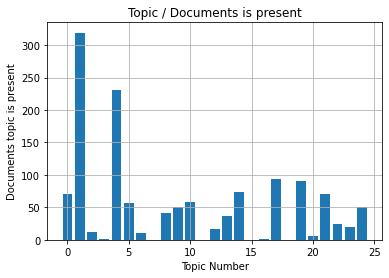

In [21]:
plt.bar(names, y_values, label='data science')
plt.xlabel('Topic Number')
plt.ylabel('Documents topic is present')
plt.title('Topic / Documents is present')
plt.grid(True)